In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import struct
import numpy as np




In [3]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [4]:

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape((len(labels),28,28))

    return images, labels

In [5]:
X_train, y_train = load_mnist('./data')
                              
X_test, y_test = load_mnist('./data',kind='t10k')
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
def imgs_show_ne(imgs,row,col):
    imgs = imgs + 0.5
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [7]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')
    

In [8]:
def imgs_show(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
    

In [9]:
def normal_minist(img):
    return ((img / 255.0) -0.5)*2

In [10]:
def expend_HWC(img):
    return np.expand_dims(img,axis=3)


In [11]:
def to_CHW(img):
    return np.transpose(img,(0,3,1,2))
def to_HWC(img):
    return np.transpose(img,(0,2,3,1))

In [12]:
#只能运行一次
X_train_nor = expend_HWC(X_train)
X_train_nor = normal_minist(X_train_nor)
X_train_nor = to_CHW(X_train_nor)
print(X_train_nor.shape)

X_test_nor = expend_HWC(X_test)
X_test_nor = normal_minist(X_test_nor)
X_test_nor = to_CHW(X_test_nor)
print(X_test_nor.shape)




(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [13]:
eval_index = 0


In [14]:

test_postitive = X_test_nor[y_test == eval_index]
test_nagivate = X_test_nor[y_test != eval_index]
# print(test_postitive.shape)
# print(test_nagivate.shape)


train_positive = X_train_nor[y_train == eval_index][[0,55,1111,1009,327,128,5000,469,2000,3001]]
label_positive = y_train[y_train == eval_index][[0,55,1111,1009,327,128,5000,469,2000,3001]]
print(label_positive)
# imgs_show(train_positive,2,5)
# train_nagivate = np.concatenate((train_1 , train_2 ,train_3 , train_4 ,train_5 ,
#                                  train_6 , train_7 ,train_8 ,train_9)) 
train_nagivate = X_train_nor[y_train != eval_index]
label_nagivate = y_train[y_train != eval_index]




[0 0 0 0 0 0 0 0 0 0]


(54077, 1, 28, 28)
[4 9 2 2 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4]


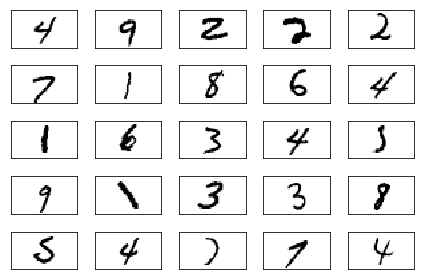

In [15]:

print(train_nagivate.shape)
print(label_nagivate[100:125])

imgs_show(np.squeeze(train_nagivate[100:125]) ,5,5)

In [16]:
shuf_index = np.random.permutation(len(train_nagivate))

In [17]:
def num_flat_features(x):
    size = x.size()[1:]
    num_features =1
        
    for s in size:
        num_features *= s
    return num_features
        

In [18]:
def decodeForward(x):
        #decode
        x = F.leaky_relu(self.conv1(x))
        self.features['relu1'] = x
        
        x = F.leaky_relu(self.conv2(x))
        self.features['relu2'] = x
        
        x = F.leaky_relu(self.conv3(x))
        self.features['relu3'] = x
        
        return x
    
def encodeforward(self,x):
        x_g = self.up1(x)
        self.features['up1'] = x_g
        x_g = F.leaky_relu(self.conv_d1(x_g))
        self.features['relu_d1'] = x_g
        
        x_g = self.up2(x_g)
        self.features['up2'] = x_g
        x_g = F.leaky_relu(self.conv_d2(x_g))
        self.features['relu_d2'] = x_g
        
        x_g = self.up3(x_g)
        self.features['up3'] = x_g
        x_g = F.leaky_relu(self.conv_d3(x_g))
        self.features['relu_d3'] =x_g
        
        x_g = self.conv_d4(x_g)
        self.features['conv_d4'] = x_g
        
        x_g = F.tanh(x_g)
        self.features['tanh'] = x_g
        return  x_g

In [19]:
class AutoCodeNet(nn.Module):
    def __init__(self):
        super(AutoCodeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,8,kernel_size=3,stride=2,padding=1)
#         self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,kernel_size=3,stride=2,padding=1)
#         self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(16,24,kernel_size=3,stride=2,padding=1)
#         self.pool3 = nn.MaxPool2d(2,2,padding=1)

        self.fc1 = nn.Linear(24*4*4,100)
        self.fc2 = nn.Linear(100,10)
      
            
        
        self.up1 = nn.Upsample(scale_factor = 2,mode='nearest')
        self.conv_d1 = nn.Conv2d(24,16,kernel_size=3,stride=1,padding=1)
        self.up2 = nn.Upsample(scale_factor = 2)
        self.conv_d2 = nn.Conv2d(16,8,kernel_size=3,stride=1)
        self.up3 = nn.Upsample(scale_factor = 2)
        self.conv_d3 = nn.Conv2d(8,8,kernel_size=3,stride=1,padding=1)
        
        self.conv_d4 = nn.Conv2d(8,1,kernel_size=3,stride=1,padding=1)
        
        self.features={}
        
    def decodeForward(self,x):
        #decode
        x = F.leaky_relu(self.conv1(x))
        self.features['relu1'] = x
        
        x = F.leaky_relu(self.conv2(x))
        self.features['relu2'] = x
        
        x = F.leaky_relu(self.conv3(x))
        self.features['relu3'] = x
        
        return x
    
    def encodeforward(self,x):
        x_g = self.up1(x)
        self.features['up1'] = x_g
        x_g = F.leaky_relu(self.conv_d1(x_g))
        self.features['relu_d1'] = x_g
        
        x_g = self.up2(x_g)
        self.features['up2'] = x_g
        x_g = F.leaky_relu(self.conv_d2(x_g))
        self.features['relu_d2'] = x_g
        
        x_g = self.up3(x_g)
        self.features['up3'] = x_g
        x_g = F.leaky_relu(self.conv_d3(x_g))
        self.features['relu_d3'] =x_g
        
        x_g = self.conv_d4(x_g)
        self.features['conv_d4'] = x_g
        
        x_g = F.tanh(x_g)
        self.features['tanh'] = x_g
        return  x_g
        
        
    def forward(self,x):
        #decode
        x = F.leaky_relu(self.conv1(x))
        self.features['relu1'] = x
        
        x = F.leaky_relu(self.conv2(x))
        self.features['relu2'] = x
        
        x = F.leaky_relu(self.conv3(x))
        self.features['relu3'] = x
        
        #class
        
        x_c = x.view(-1,num_flat_features(x))
        x_c = F.leaky_relu(self.fc1(x_c))
        x_c = F.dropout(x_c, training=self.training)
        x_c = self.fc2(x_c)
        x_c = F.log_softmax(x_c,dim=1)
        
        #encode
        
        x_g = self.up1(x)
        self.features['up1'] = x_g
        x_g = F.leaky_relu(self.conv_d1(x_g))
        self.features['relu_d1'] = x_g
        
        x_g = self.up2(x_g)
        self.features['up2'] = x_g
        x_g = F.leaky_relu(self.conv_d2(x_g))
        self.features['relu_d2'] = x_g
        
        x_g = self.up3(x_g)
        self.features['up3'] = x_g
        x_g = F.leaky_relu(self.conv_d3(x_g))
        self.features['relu_d3'] =x_g
        
        x_g = self.conv_d4(x_g)
        self.features['conv_d4'] = x_g
        
        x_g = F.tanh(x_g)
        self.features['tanh'] = x_g
        
        return x_g ,x_c
        
        
        
        
        
        
        

In [20]:
net_auto = AutoCodeNet()
# print(net_auto)
inp1 = Variable(torch.randn((10,1,28,28)))

out1,classs = net_auto(inp1)
print(out1.size())
print(classs.size())

print("decode:")
print(net_auto.features['relu1'].size())
# print(net_auto.features['pool1'].size())
print(net_auto.features['relu2'].size())
# print(net_auto.features['pool2'].size())
print(net_auto.features['relu3'].size())
# print(net_auto.features['pool3'].size())

print("encode:")
print(net_auto.features['up1'].size())
print(net_auto.features['relu_d1'].size())
print(net_auto.features['up2'].size())
print(net_auto.features['relu_d2'].size())
print(net_auto.features['up3'].size())
print(net_auto.features['relu_d3'].size())
print(net_auto.features['conv_d4'].size())
print(net_auto.features['tanh'].size())



torch.Size([10, 1, 28, 28])
torch.Size([10, 10])
decode:
torch.Size([10, 8, 14, 14])
torch.Size([10, 16, 7, 7])
torch.Size([10, 24, 4, 4])
encode:
torch.Size([10, 24, 8, 8])
torch.Size([10, 16, 8, 8])
torch.Size([10, 16, 16, 16])
torch.Size([10, 8, 14, 14])
torch.Size([10, 8, 28, 28])
torch.Size([10, 8, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([10, 1, 28, 28])


In [21]:
def getnext(train_x,train_y,batch_size):
    batchs = len(train_y) // batch_size
    print(len(train_y),batchs)

    for i in range(batchs):
        x = train_x[batch_size * i : batch_size * (i+1)]
        y = train_y[batch_size * i : batch_size * (i+1)]
        yield x,y
        

In [22]:
def get_nagivate_next(train_positive,train_nagivate):
    batch_size = len(train_positive) 
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((np.zeros(batch_size),np.ones(batch_size)))
        shuf_index = np.random.permutation(len(y))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 
        

In [23]:
def get_nagivate_batch_next(train_positive,train_nagivate,batch_size):
#     batch_size = len(train_positive) 
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((np.zeros(len(train_positive)),np.ones(len(train_nagivate))))
        shuf_index = np.random.permutation(len(x))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 

In [24]:
def get_next_posi_nag(train_positive,train_nagivate,label_positive, label_nagivate ,batch_size):
#     batch_size = len(train_positive) 
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((label_positive,label_nagivate[batch_size * i : batch_size * (i+1)]))
        shuf_index = np.random.permutation(len(x))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 

130 2
(74, 1, 28, 28)
[2 8 4 4 3 1 4 2 9 7 0 4 6 6 7 8 6 7 2 0 0 2 7 9 1 4 1 8 7 9 0 0 1 5 3 3 1
 9 3 5 9 3 1 1 6 1 4 6 5 0 1 6 6 9 0 4 1 3 5 9 4 3 4 5 9 8 0 0 8 0 1 9 3 7]


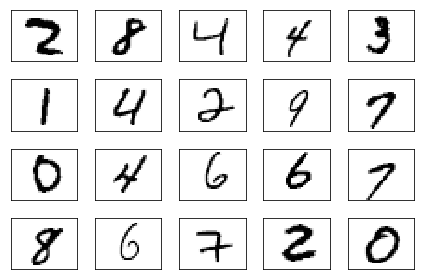

(74, 1, 28, 28)
[8 7 1 0 5 3 6 2 7 4 4 1 2 4 2 5 1 3 0 6 5 4 1 0 2 6 9 7 9 3 9 1 0 0 1 7 1
 1 8 0 2 6 1 9 6 3 7 9 8 8 3 7 5 6 6 8 0 2 3 7 0 4 0 1 7 4 0 8 3 4 2 1 7 3]


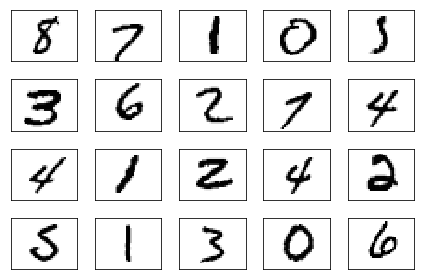

In [25]:
datas = get_next_posi_nag(train_positive,train_nagivate[:130],label_positive,label_nagivate, 64)
for x,y in datas:
    print(x.shape)
    
    print(y)
    imgs_show(np.squeeze( x),4,5)


In [26]:
net_auto = AutoCodeNet()

In [27]:

# net_auto = torch.load('model_autoEncode5.pkl')
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
# device = torch.device("cuda" if use_cuda else "cpu")
net_auto.cuda()
net_auto.double()


criterion = nn.MSELoss()
optimizer = optim.SGD(net_auto.parameters(),lr=0.0001,momentum=0.9,weight_decay=5e-4)


In [51]:
#X_train_nor

net_auto.train()
for epoch in range(50):
    datas = get_next_posi_nag(train_positive,train_nagivate,label_positive,label_nagivate, 10)
    trainloss_g = 0
    trainloss_c = 0
    
    for x,y in datas:
        inputs ,lables = Variable(torch.from_numpy(x)).cuda(),Variable(torch.from_numpy(y).long()).cuda()
#         print(inputs.size())
#         print(lables[0])
        optimizer.zero_grad()
        output,classify = net_auto(inputs)
#         print(output.size())
#         print(classify.size())
        loss_g = criterion(output,inputs) 
        loss_c = F.nll_loss(classify,lables)
        loss = loss_g + loss_c
        trainloss_g += loss_g
        trainloss_c += loss_c
        loss.backward()
        optimizer.step()
        
    print('%d  gloss: %.3f, class loss:%.3f' % (epoch ,  trainloss_g,trainloss_c))
torch.save(net_auto,'model_autoEncode5.pkl')

54077 5407
0  gloss: 73.115, class loss:65.025
54077 5407
1  gloss: 72.474, class loss:61.114
54077 5407
2  gloss: 72.256, class loss:58.865
54077 5407
3  gloss: 72.103, class loss:55.201
54077 5407
4  gloss: 71.996, class loss:58.340
54077 5407
5  gloss: 71.874, class loss:56.552
54077 5407
6  gloss: 71.763, class loss:54.765
54077 5407
7  gloss: 71.697, class loss:56.529
54077 5407
8  gloss: 71.641, class loss:55.624
54077 5407
9  gloss: 71.631, class loss:56.315
54077 5407
10  gloss: 71.568, class loss:56.687
54077 5407
11  gloss: 71.508, class loss:54.129
54077 5407
12  gloss: 71.464, class loss:55.025
54077 5407
13  gloss: 71.374, class loss:54.796
54077 5407
14  gloss: 71.332, class loss:53.726
54077 5407
15  gloss: 71.270, class loss:55.295
54077 5407
16  gloss: 71.258, class loss:54.747
54077 5407
17  gloss: 71.192, class loss:55.044
54077 5407
18  gloss: 71.150, class loss:52.234
54077 5407
19  gloss: 71.118, class loss:52.976
54077 5407
20  gloss: 71.130, class loss:54.415
54

In [29]:
# net_auto = torch.load('model_autoEncode5.pkl')
net_auto.cuda()
net_auto.eval()
test_loss = 0
correct = int(0)

test_datas = getnext(test_postitive,np.zeros(len(test_postitive)),4)
for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x)).cuda(), Variable(torch.from_numpy(y).long()).cuda()
        _,classify = net_auto(inputs)
        test_loss += F.nll_loss(classify, labels, size_average=False) # sum up batch loss
        pred = classify.max(1,keepdim=True)[1]
        print(pred)
        correct += pred.eq(labels.view_as(pred)).sum().data
#         print(correct.cpu().numpy())
# print(correct)
# print(test_loss)

    
    

980 245
Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor 

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 4x1 (GPU 0)]

Variable containing:
 8
 8
 8
 8
[torch.cuda.LongTensor of size 

torch.Size([1, 24, 4, 4])

-0.0343 -0.0331 -0.0131 -0.0269
 0.3759 -0.0239 -0.0863  2.3891
 0.3759 -0.0127  2.9681 -0.0182
 0.9177 -0.0251 -0.0960  2.1805
[torch.cuda.DoubleTensor of size 4x4 (GPU 0)]



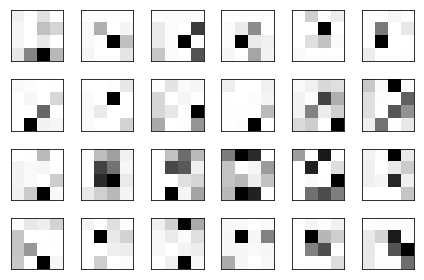

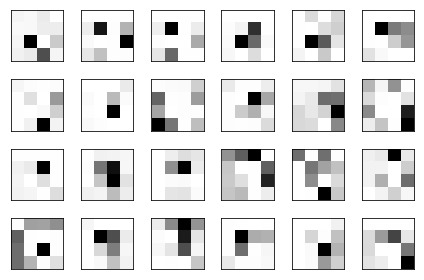

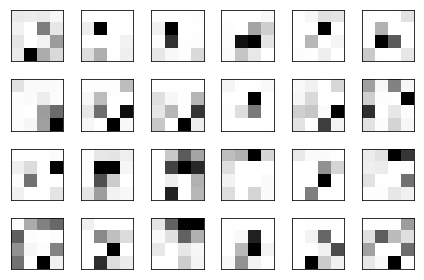


(0 ,.,.) = 
 -0.0343 -0.0341 -0.0133 -0.0197
  0.3220  0.0623 -0.1081  1.9999
  0.3778  2.4363  2.9875 -1.2165
  0.9050 -1.7577 -0.0889  2.8555
[torch.cuda.DoubleTensor of size 1x4x4 (GPU 0)]

torch.Size([1, 1, 28, 28])


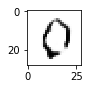

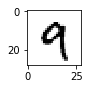

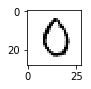

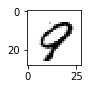

In [95]:
net_auto = torch.load('model_autoEncode5.pkl')
net_auto.cuda()
net_auto.eval()


inputs1,inputs2,inputs3 = Variable(torch.from_numpy( train_positive[2:3])).cuda(), \
    Variable(torch.from_numpy( X_train_nor[y_train==9][11:12])).cuda(),\
    Variable(torch.from_numpy( X_train_nor[y_train==9][501:502])).cuda(),
#     outputs = net_auto(inputs)
#     img_show(np.squeeze(outputs.data))
    
middle1 = net_auto.decodeForward(inputs1)
middle2 = net_auto.decodeForward(inputs2)
middle3 = net_auto.decodeForward(inputs3)
print(middle1.size())
print(middle1.data[0][2])
# print(middle2.data[0][0])
imgs_show(np.squeeze(middle1.data),4,6)
imgs_show(np.squeeze(middle2.data),4,6)
imgs_show(np.squeeze(middle3.data),4,6)
    
middle1.data[:,:,:,:] = middle1.data[:,:,:,:]  - 0.5 *( middle2.data[:,:,:,:] - middle3.data[:,:,:,:])
    
print(middle1.data[:,2,:,:])
# print(middle2.data[:,0,:,:])

out = net_auto.encodeforward(middle1)
print(out.size())
img_show(np.squeeze(out.data))
img_show(np.squeeze(inputs2.data))
img_show(np.squeeze(inputs1.data))
img_show(np.squeeze(inputs3.data))

